Impotação de bibliotecas

In [31]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

Carregamento das bases e separação dos datasets de treinamento e a classe

In [33]:
iris = load_iris()

x = iris.data[:, 2:]
y = iris.target

### Profundidade 2

Criação da árvore de profundidade 2

In [34]:
tree_clf = DecisionTreeClassifier( max_depth = 2)
tree_clf.fit( x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Exibindo a árvore com o pydotplus

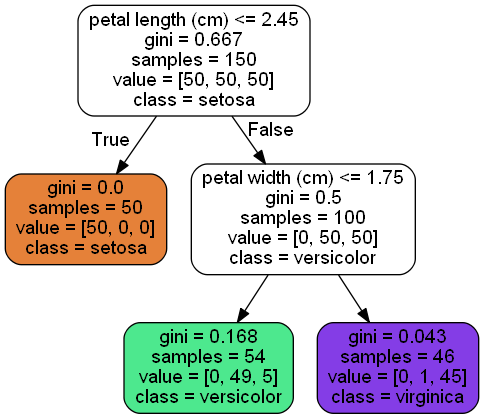

In [35]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(tree_clf,
                out_file = dot_data,
                feature_names = iris.feature_names[ 2:],
                class_names = iris.target_names,
                rounded = True,
                filled = True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

Classificando a própria base de testes

In [36]:
y_pred = tree_clf.predict(x)

Na matriz de confusão conseguimos verificar que somente 6 elementos foram classificados errados

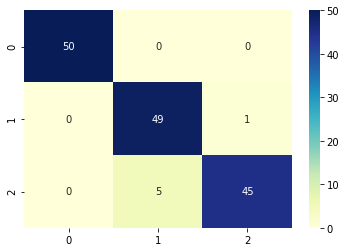

In [54]:
sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, cmap="YlGnBu")

In [11]:
from sklearn.metrics import accuracy_score

In [14]:
print("Precisão do algoritmo com profundidade 2: ", accuracy_score(y, y_pred))

Precisão do algoritmo com profundidade 2:  0.96


Tendo uma precisão de 96%

### Profundidade 3
Criamos a árvore de profundidade 3

In [55]:
tree_clf_3 = DecisionTreeClassifier( max_depth = 3)
tree_clf_3.fit( x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Exibindo a árvore com o pydot

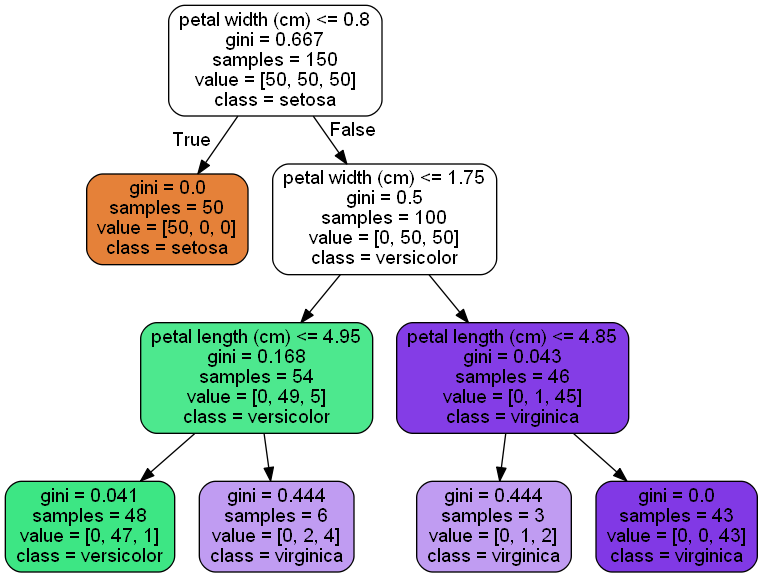

In [56]:
dot_data = StringIO()

export_graphviz(tree_clf_3,
                out_file = dot_data,
                feature_names = iris.feature_names[ 2:],
                class_names = iris.target_names,
                rounded = True,
                filled = True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


Image(graph.create_png())

Na matrix de confusão vemos que somente 4 elementos foram classificados errados

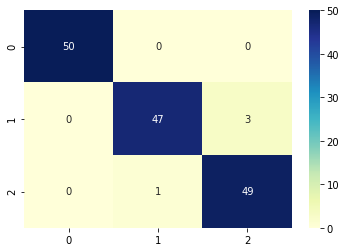

In [57]:
y_pred_3 = tree_clf_3.predict(x)

sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred_3)), annot=True, cmap="YlGnBu")

In [18]:
print("Precisão do algoritmo com profundidade 3: ", accuracy_score(y, y_pred_3))

Precisão do algoritmo com profundidade 3:  0.9733333333333334


Tendo uma precisão de 97,33%

### Conclusão

Apesar do algoritmo treinado com a profundidade 3 ter uma acuracia maior com o próprio dataset, isso indica que ele está muito específico, podendo ser um overfitting e ao utilizar esse modelo com dados nunca vistos o resultado pode ser inacurado.

Na árvore de profundidade 2 o gini da folha que reconhecia a  classe versicolor já demonstra ser baixo o suficiente para  minimizar o erro e garantir uma generalização para uma base de dados desconhecida. Quando comparamos com a árvore de profundidade 3, as folhas do 3º nível possuem 2 nós com o gini 0.444, indicando uma possível alta taxa de erro para datasets externos. 
